# MSA 2025 Phase 2 - Part 1

In [130]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Find all variables and understand them

### Data set selcted: X store sales

In [131]:
# Data set selcted: X store sales
df = pd.read_csv('datasets/X store sales/store_sales.csv', encoding='latin1')  # ?containing special characters?

### - Load chosen datasets from the datasets folder into your notebook and display the first ten instances.

In [132]:
## Get first 10 rows from df
pd.set_option('display.max_columns', None)   # Set the display size
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)

# Print result
print(df.head(10))  # First 10 rows (instances)

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID    Customer Name    Segment        Country             City         State  Postal Code   Region       Product ID   Category Sub-Category                                                      Product Name      Sales  Quantity  Discount     Profit
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520      Claire Gute   Consumer  United States        Henderson      Kentucky        42420    South  FUR-BO-10001798  Furniture    Bookcases                                 Bush Somerset Collection Bookcase   261.9600         2      0.00    41.9136
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520      Claire Gute   Consumer  United States        Henderson      Kentucky        42420    South  FUR-CH-10000454  Furniture       Chairs       Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back   731.9400         3      0.00   219.5820
2       4  US-2015-108966  10/1

Form first 10 instances there are 21 columns (variables) in this data set. 

### - Provide key statistical measures such as mean and standard deviation without hardcoding them.

In [133]:
# Summary
print(df.describe(include='number'))

            Row ID   Postal Code        Sales     Quantity     Discount       Profit
count  2121.000000   2121.000000  2121.000000  2121.000000  2121.000000  2121.000000
mean   5041.643564  55726.556341   349.834887     3.785007     0.173923     8.699327
std    2885.740258  32261.888225   503.179145     2.251620     0.181547   136.049246
min       1.000000   1040.000000     1.892000     1.000000     0.000000 -1862.312400
25%    2568.000000  22801.000000    47.040000     2.000000     0.000000   -12.849000
50%    5145.000000  60505.000000   182.220000     3.000000     0.200000     7.774800
75%    7534.000000  90032.000000   435.168000     5.000000     0.300000    33.726600
max    9991.000000  99301.000000  4416.174000    14.000000     0.700000  1013.127000


There are 6 numerical variables however ID and Postal Code are not meaningful for statistical measures. 

Sales: The average is 349.83, with a standard deviation of 503.18, indicating significant variation in sales figures.  
Quantity: The average is 3.79, with a standard deviation of 2.25, indicating that most orders involve purchasing 1 to 5 items.  
Discount: The average is 0.174, with a standard deviation of 0.18, indicating that most orders have relatively low discounts.
Profit: Average 8.70, standard deviation 136.05, indicating a dispersed profit distribution.

### - Visualize numerical columns through appropriate plots, e.g. bar plots, histograms, box and whisker plots, etc.

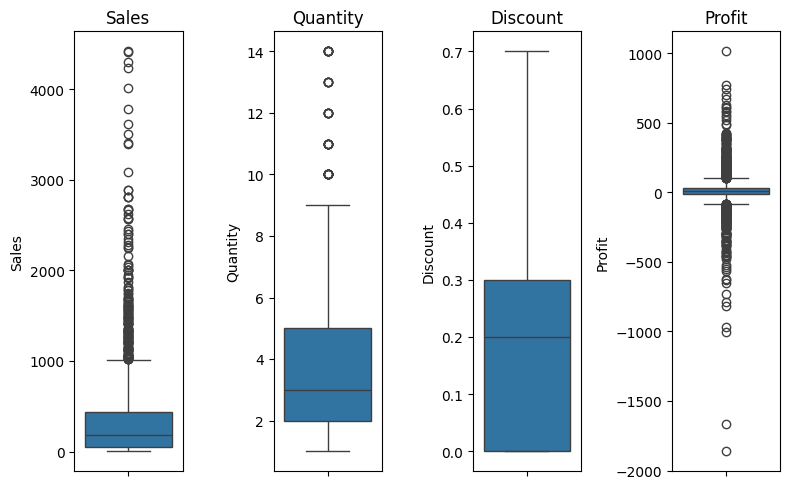

In [134]:
# Box plots
selected_columns = ['Sales', 'Quantity', 'Discount', 'Profit']
plt.figure(figsize=(8, 5))
for i, col in enumerate(selected_columns):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

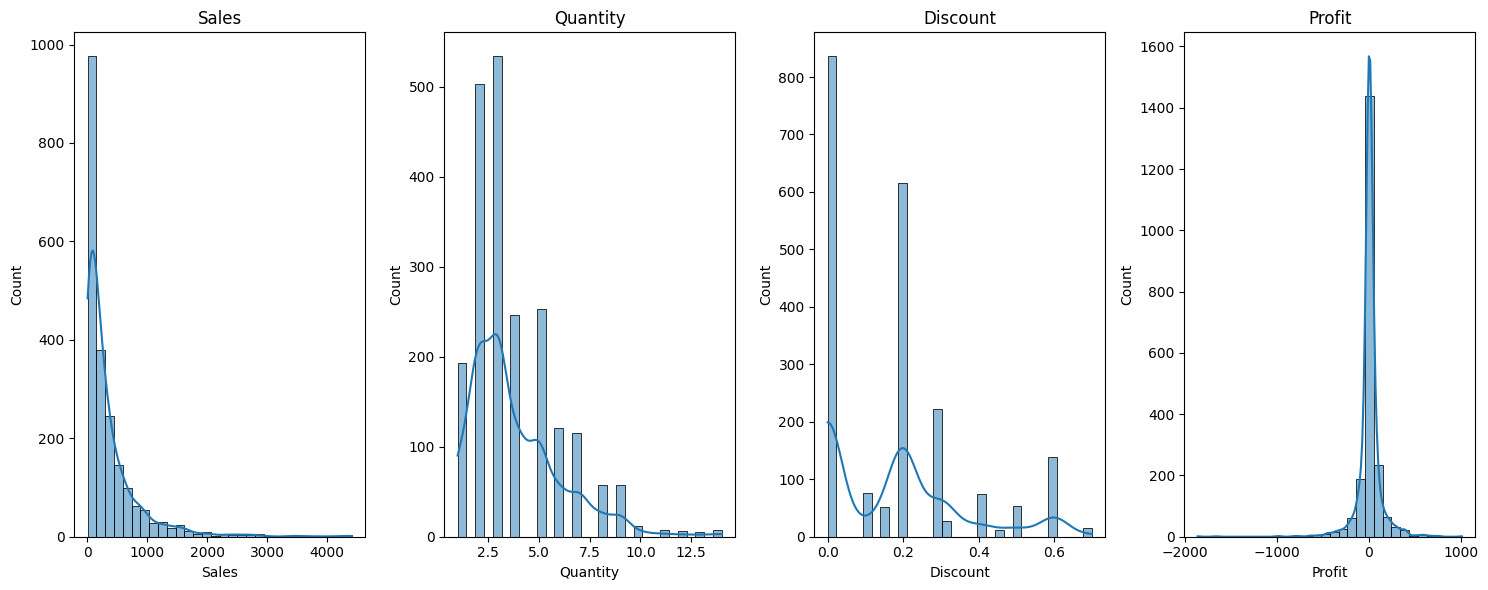

In [135]:
# Histogram
plt.figure(figsize=(15, 6))
for i, col in enumerate(selected_columns):
    plt.subplot(1, 4, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()

### - Convert data types of columns as needed, ensuring all values fed into machine learning models are numerical.

In [136]:
# Check data types for all varibales 
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [137]:
# Convert Row ID and  Postal Code to character
df[['Row ID', 'Postal Code']] = df[['Row ID', 'Postal Code']].astype(str)

# Check if convertion was successful
df[['Row ID', 'Postal Code']].dtypes

Row ID         object
Postal Code    object
dtype: object

In [138]:
# Convert Order Date and Ship Date to a pandas datetime object
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')


# Check if convertion was successful
df[['Order Date', 'Ship Date']].dtypes

Order Date    datetime64[ns]
Ship Date     datetime64[ns]
dtype: object

In [140]:
# Replace Order Date & Ship Date with derived numeric features like year, month, day, etc.
df['order_year'] = df['Order Date'].dt.year.astype(int)
df['order_month'] = df['Order Date'].dt.month.astype(int)
df['order_day'] = df['Order Date'].dt.day.astype(int)
df['order_weekday'] = df['Order Date'].dt.weekday.astype(int)
df['order_is_weekend'] = (df['order_weekday'] >= 5).astype(int)
df['order_quarter'] = df['Order Date'].dt.quarter.astype(int)

df['ship_year'] = df['Ship Date'].dt.year.astype(int)
df['ship_month'] = df['Ship Date'].dt.month.astype(int)
df['ship_day'] = df['Ship Date'].dt.day.astype(int)
df['ship_weekday'] = df['Ship Date'].dt.weekday.astype(int)
df['ship_is_weekend'] = (df['Ship Date'].dt.weekday >= 5).astype(int)
df['ship_quarter'] = df['Ship Date'].dt.quarter.astype(int)

In [159]:
# One-hot-coding
categorical_cols = df.select_dtypes(include='object').columns.tolist()
df_onehot = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

# Drop non-numberical columns Order Date & Ship date
df_onehot.drop(columns=['Order Date', 'Ship Date'], inplace=True)

# Check
df_onehot.dtypes

Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
order_year                int64
                         ...   
order_quarter_2016Q4       bool
order_quarter_2017Q1       bool
order_quarter_2017Q2       bool
order_quarter_2017Q3       bool
order_quarter_2017Q4       bool
Length: 6975, dtype: object

Now every column is numeric.

## 2. Visualise data

### - Overall Sales Trend (Daily)

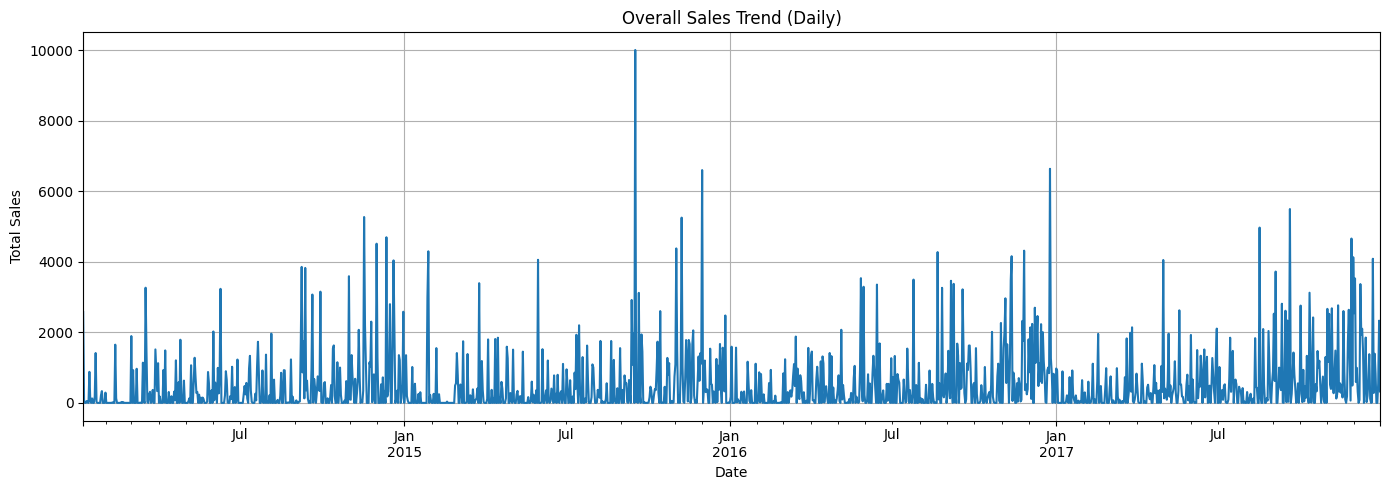

In [148]:
# Calculate daily sales by aggregating order dates
daily_sales = df.set_index('Order Date')['Sales'].resample('D').sum()

plt.figure(figsize=(14, 5))
daily_sales.plot(title="Overall Sales Trend (Daily)")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


The chart shows significant Daily sales fluctuations, there are multiple sales peaks, but the overall sales trend is relatively stable.

### - Overall Sales Trend (Weekly)

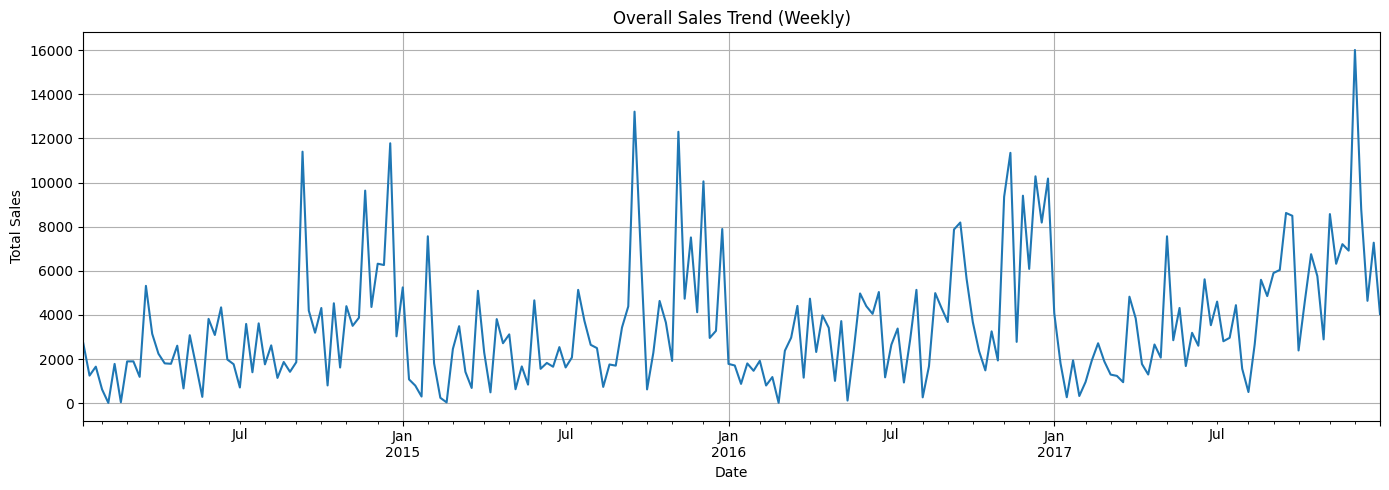

In [151]:
# Calculate weekly sales by aggregating order dates
weekly_sales = df.set_index('Order Date')['Sales'].resample('W').sum()

plt.figure(figsize=(14, 5))
weekly_sales.plot(title="Overall Sales Trend (Weekly)")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


The chart shows that weekly sales fluctuated upward in a relatively stable trend, with only a slight decline at the beginning of 2017 and a faint periodic peak.

### - Overall Sales Trend (Monthly)

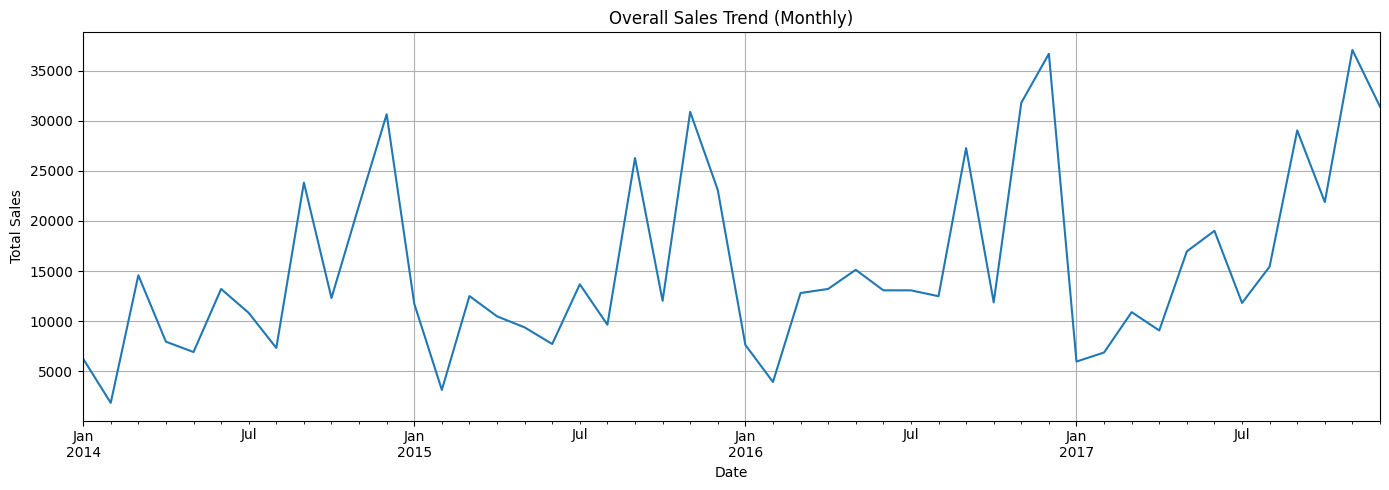

In [153]:
# Calculate monthly sales by aggregating order dates
monthly_sales = df.set_index('Order Date')['Sales'].resample('ME').sum()

plt.figure(figsize=(14, 5))
monthly_sales.plot(title="Overall Sales Trend (Monthly)")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


The chart shows that monthly sales have generally risen steadily and consistently, with very obvious periodic fluctuations and significant sales peaks in certain months of the year.

### - Overall Sales Trend (Quarterly)

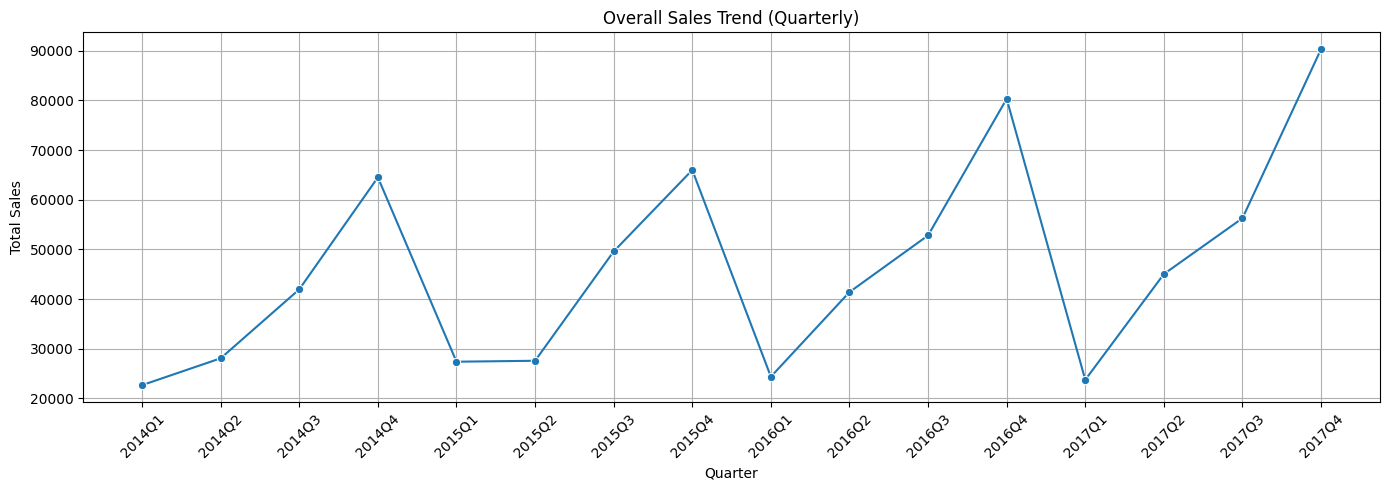

In [155]:
# Create a new column to drived quarter
df['order_quarter'] = df['Order Date'].dt.to_period('Q').astype(str)

# Calculate quarterly sales by aggregating order dates
quarterly_sales = df.groupby('order_quarter')['Sales'].sum().reset_index()

plt.figure(figsize=(14, 5))
sns.lineplot(x='order_quarter', y='Sales', data=quarterly_sales, marker='o')
plt.title("Overall Sales Trend (Quarterly)")
plt.xlabel("Quarter")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


The chart shows that overall quarterly sales fluctuate upward, demonstrating a clear periodicity. Sales rise steadily from the 1st quarter, usually peaking in the 4th quarter, and then falling sharply in the 1st quarter.

### - Overall Sales Trend (Yearly)

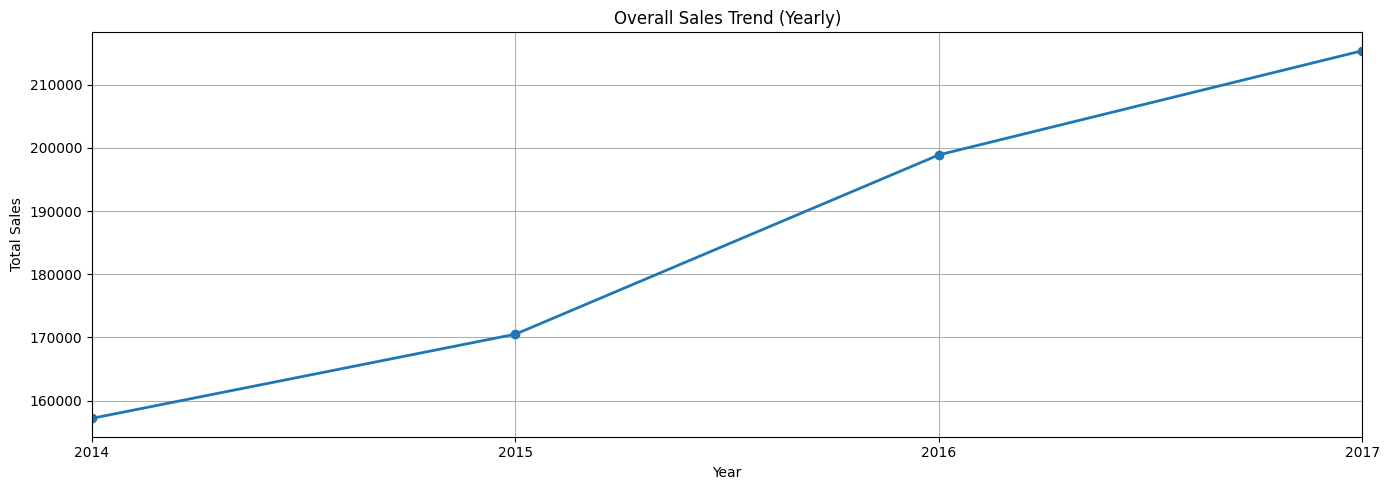

In [158]:
# Calculate yearly sales by aggregating order dates
yearly_sales = df.set_index('Order Date')['Sales'].resample('YE').sum()

plt.figure(figsize=(14, 5))
yearly_sales.plot(title="Overall Sales Trend (Yearly)", marker='o', linewidth=2)
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

The chart shows that annual sales have been steadily increasing, indicating a positive growth trend overall. 

### - Does the weekend affect sales?

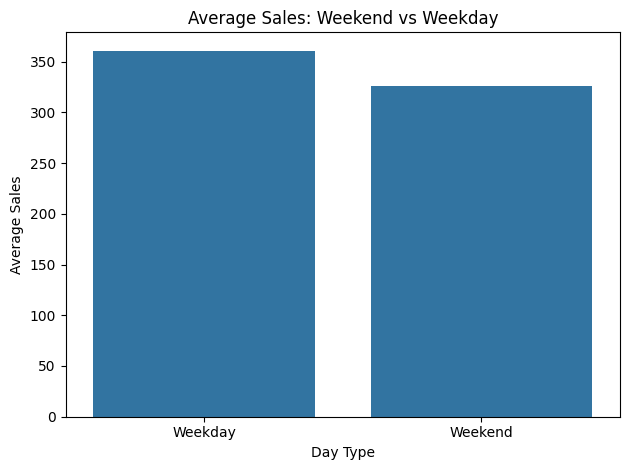

In [ ]:
# Calculate average sales for weekend and weekday
weekend_sales = df.groupby('order_is_weekend')['Sales'].mean().reset_index()

# Map 0/1 to readable labels
weekend_sales['Weekend'] = weekend_sales['order_is_weekend'].map({0: 'Weekday', 1: 'Weekend'})

sns.barplot(x='Weekend', y='Sales', data=weekend_sales)
plt.title("Average Sales: Weekend vs Weekday")
plt.xlabel("Day Type")
plt.ylabel("Average Sales")
plt.tight_layout()
plt.show()

From this bar chart, there is not much difference between sales on weekends and weekdays.

### - 

## 3. Clean data

In [145]:
#

## 4. Identify correlated variables

In [146]:
#

## 5. Summary